In [122]:
import pandas as pd 
from datetime import datetime    # To access datetime 
import numpy as np 
import matplotlib.pyplot as plt 
# from pandas import Series        # To work on series 
# import sklearn
# import statsmodels
# %matplotlib inline 
# import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (20,10)

In [123]:
data = pd.read_csv('2014-2019.csv')


In [124]:
data

,Datetime,P
0,20-03-14 7:30,1526.40
1,20-03-14 7:45,1609.92
2,20-03-14 8:00,1621.44
3,20-03-14 8:15,1704.96
4,20-03-14 8:30,1785.60
...,...,...
194498,05-11-19 9:15,3559.68
194499,05-11-19 9:30,3484.80
194500,05-11-19 9:45,3588.48
194501,05-11-19 10:00,3634.56


In [125]:
data['Datetime'] = pd.to_datetime(data.Datetime, format='%d-%m-%y %H:%M')
data


,Datetime,P
0,2014-03-20 07:30:00,1526.40
1,2014-03-20 07:45:00,1609.92
2,2014-03-20 08:00:00,1621.44
3,2014-03-20 08:15:00,1704.96
4,2014-03-20 08:30:00,1785.60
...,...,...
194498,2019-11-05 09:15:00,3559.68
194499,2019-11-05 09:30:00,3484.80
194500,2019-11-05 09:45:00,3588.48
194501,2019-11-05 10:00:00,3634.56


In [126]:
data.set_index('Datetime', inplace = True)

In [127]:
for count, value in enumerate(data.values, start=0):  # Can improve it.
    if value <= 400 or value >= 20000 or pd.isna(data.values[count]): #ps.isna checks if data is na
        data.values[count] = data.values[count - 168*4]  # Takes previous week's value

data = data.resample('15min').mean()
for count, value in enumerate(data.values, start=0):  # Can improve it.
    if value <= 400 or value >= 20000 or pd.isna(data.values[count]): #ps.isna checks if data is na
        data.values[count] = data.values[count - 168*4]  # Takes previous week's value


c:\users\tolugben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys
c:\users\tolugben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater_equal
  import sys


In [128]:
data=data['2015':]
data


,P
Datetime,
2015-01-01 00:00:00,463.68
2015-01-01 00:15:00,440.64
2015-01-01 00:30:00,434.88
2015-01-01 00:45:00,443.52
2015-01-01 01:00:00,460.80
...,...
2019-11-05 09:15:00,3559.68
2019-11-05 09:30:00,3484.80
2019-11-05 09:45:00,3588.48


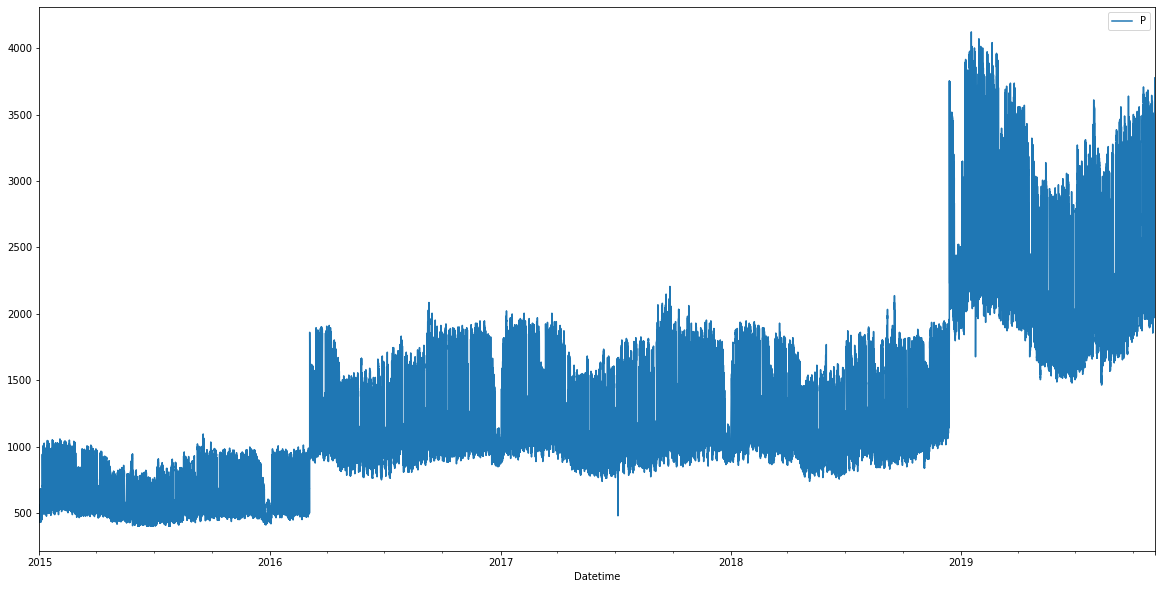

In [129]:
data.plot()

In [130]:
# data = data.resample('D').mean()
datacopy = data.copy()

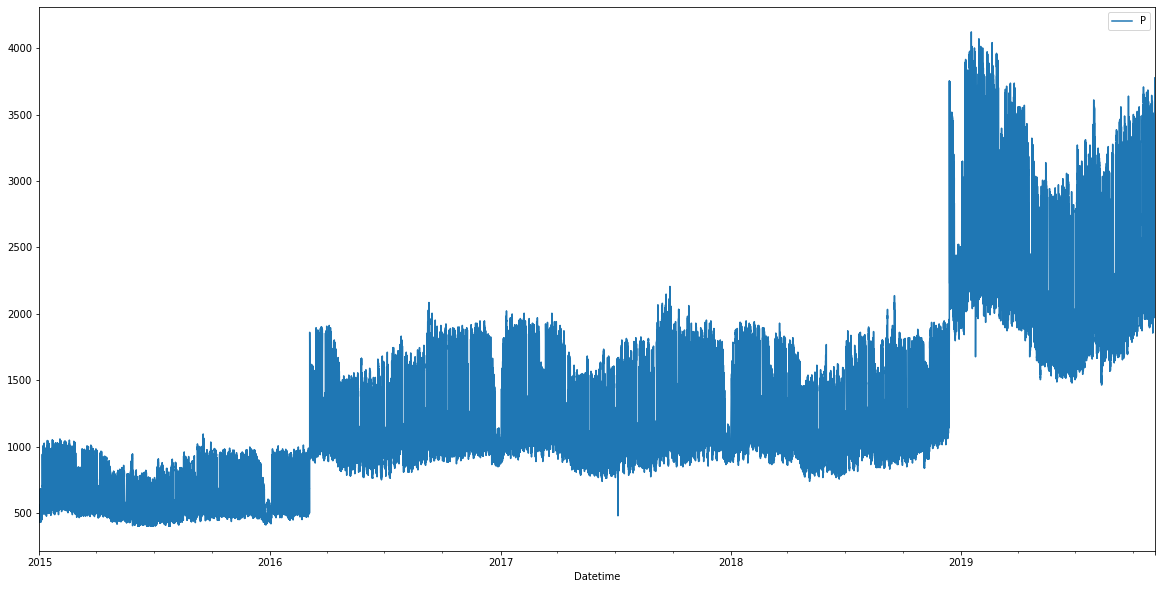

In [131]:
data.plot()

### Converting series to stationary
Stationary means mean, variance and covariance is constant over periods.

In [132]:
from statsmodels.graphics.tsaplots import plot_acf

In [133]:
data_diff = data.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model
data_diff = data_diff[1:]
data_diff.tail()

,P
Datetime,
2019-11-05 09:15:00,92.16
2019-11-05 09:30:00,-74.88
2019-11-05 09:45:00,103.68
2019-11-05 10:00:00,46.08
2019-11-05 10:15:00,-115.20


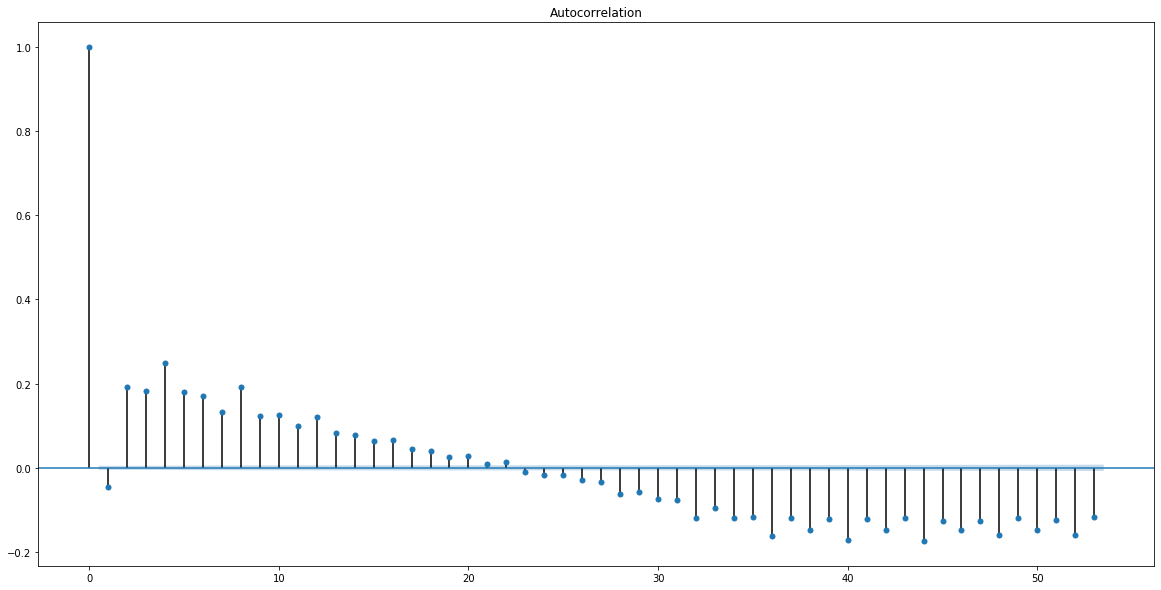

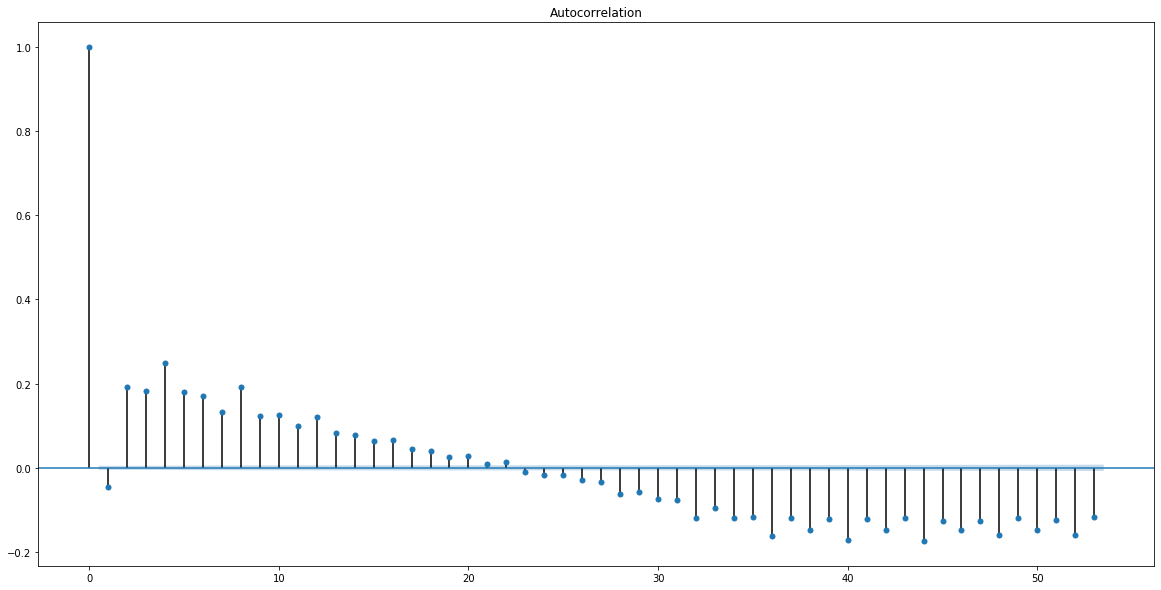

In [134]:
plot_acf(data_diff)


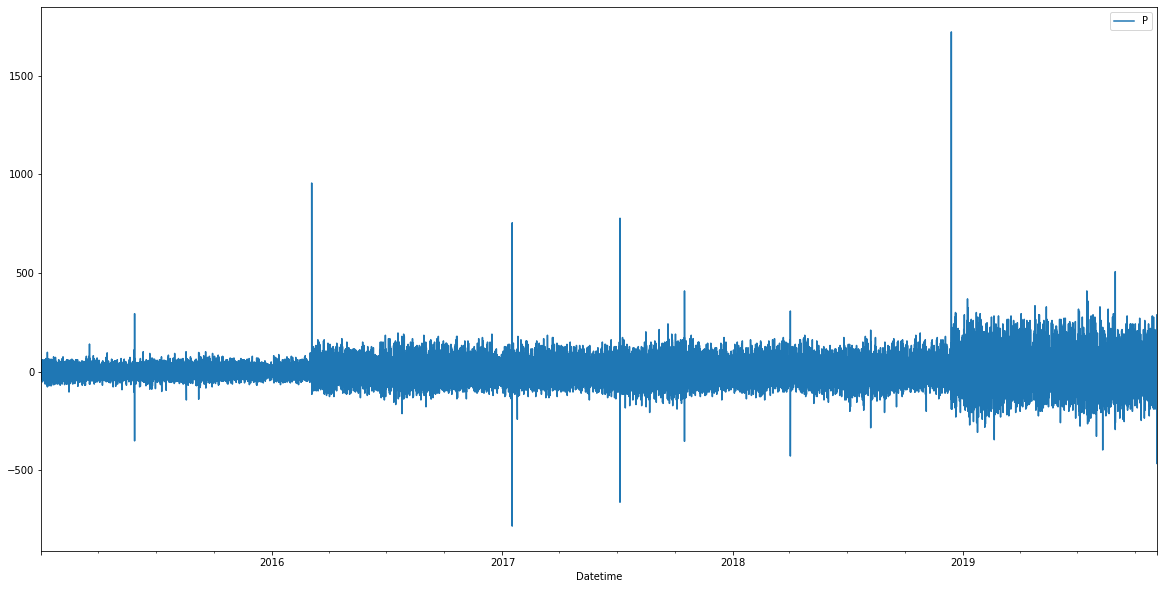

In [135]:
data_diff.plot()

In [136]:
X = data.values
split=int(len(X)-31) #Takes about 95% of data
train = X[:split]
test = X[split:]
predictions = []
len(test)

31

In [137]:
X.size == (train.size + test.size)

True

# Autoreggresive AR Model

In [138]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [139]:
predictions=model_ar_fit.predict(start=split,end=len(X)-1) #Was longer by one prediction

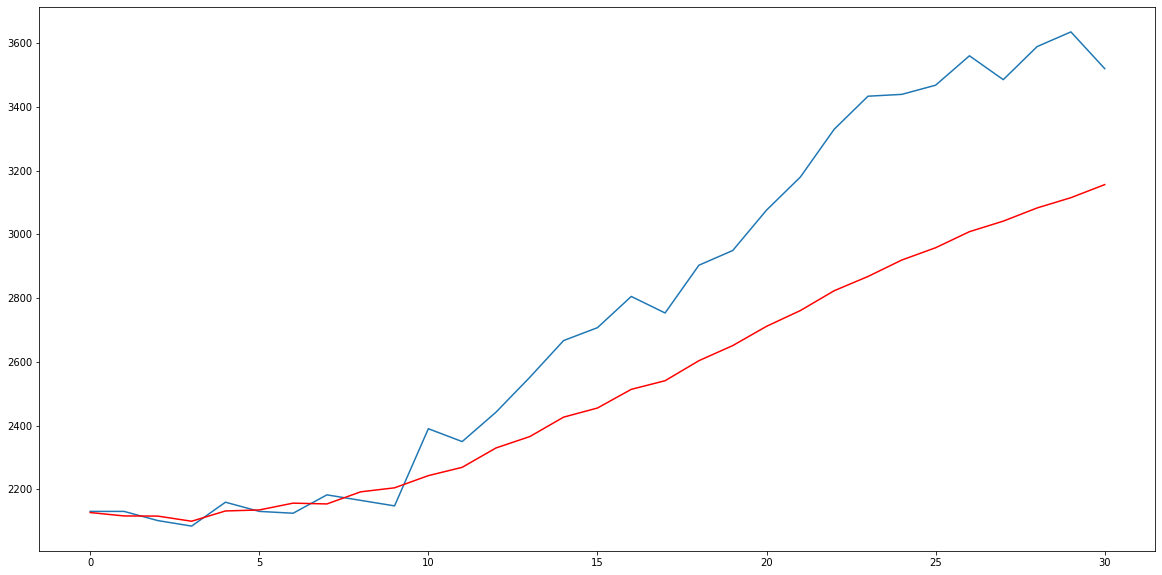

In [140]:
plt.plot(test)
plt.plot(predictions,color='red')

In [141]:
len(test) == len(predictions)

True

In [142]:
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
rmse

315.41972046012734

In [143]:
summation = list()
for i in test:
    for j in predictions:
        value = abs((i-j)/i)[0] #It returned an array
        summation.append(value)
    
MeanAbsolutePercentError = (sum(summation)/len(summation))*100
MeanAbsolutePercentError

19.70173784434065

# ARIMA model

In [144]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
""" Current Best Values For Previous 31 days
(6, 1, 7) 107
(11, 1, 13) 113
(8, 1, 8) 118
(12,1,11) 124
(5, 1 , 7) 122
(13, 1, 4) 122
(6, 1, 5) 122
(7,1,5) 125
(13, 1, 11) 125
(14, 1, 11) 127
"""
pdq = 6,1,7
model_arima = ARIMA(train,order=(pdq))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

In [ ]:
predictions= model_arima_fit.forecast(steps=len(test))[0]
predictions[:10]

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
len(test) == len(predictions)

In [ ]:
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
rmse

In [ ]:
summation = list()
for i in test:
    for j in predictions:
        value = abs((i-j)/i)[0] #It returned an array
        summation.append(value)
    
MeanAbsolutePercentError = (sum(summation)/len(summation))*100
MeanAbsolutePercentError

In [ ]:
# import itertools
# p=q=range(0,16)
# d=range(0,3)
# pdq = list(itertools.product(p,d,q)) #All possible combinations

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# array = []
# for param in pdq:
#     try:
#         model_arima = ARIMA(train,order=param)
#         model_arima_fit = model_arima.fit()
#         predictions= model_arima_fit.forecast(steps=len(test))[0]
#         mse = mean_squared_error(test, predictions)
#         rmse = sqrt(mse)
#         array.append(rmse)
#         print(param,rmse)
#     except:
#         continue
    

### Top 20 p,d,q parameters with the lowest rmse values from p,q in range(0,16), and d in range(0,3);

This test was done with 95% training data from the 2015 - 2019(Nov. 5) dataset. The parameters and the rmse values can be seen below.

### Top 15 p,d,q parameters with the lowest aic values from range(0,15); 
This test was done with 95% training data from the 2016 - 2019(Nov. 1) dataset. 
The parameters and the aic values can be seen below.

### All the tested parameters and their rmse

This test was done with 95% training data from the 2015 - 2019(Nov. 5) dataset. The parameters and the rmse values can be seen below.

(0, 0, 0) 1202.5403716948229
(0, 0, 1) 1196.5304115052993
(0, 1, 0) 300.05138200322835
(0, 1, 1) 308.11265182416685
(0, 1, 2) 291.507221036548
(0, 1, 3) 292.98274129215156
(0, 1, 4) 293.21010279860764
(0, 1, 7) 292.2695999087447
(0, 1, 8) 290.977700766777
(0, 1, 9) 297.7924696083462
(0, 1, 10) 298.10274145174265
(0, 1, 15) 299.2102901215291
(0, 2, 0) 1359.8624559056998
(0, 2, 1) 303.44946594939694
(0, 2, 2) 314.27384178985807
(1, 0, 0) 977.7481263434046
(1, 0, 1) 1086.7798237537206
(1, 0, 2) 349.1191017581426
(1, 0, 3) 350.2541910478014
(1, 0, 4) 359.1611579672495
(1, 0, 5) 507.54155591039165
(1, 0, 6) 373.3398349550137
(1, 0, 7) 428.3677476805959
(1, 0, 8) 406.33853721204684
(1, 0, 9) 373.6241814922306
(1, 0, 10) 372.32312763615664
(1, 0, 11) 376.29807100131023
(1, 0, 12) 376.5286170477204
(1, 0, 13) 378.4801045798037
(1, 0, 14) 404.3624703353701
(1, 0, 15) 409.73042620390623
(1, 1, 0) 300.79405422192224
(1, 1, 1) 295.9775053101903
(1, 1, 2) 292.76175922779606
(1, 1, 3) 292.9603838999621
(1, 1, 4) 293.85364639488745
(1, 1, 5) 292.81010889850114
(1, 1, 6) 289.20134084826094
(1, 1, 7) 291.8460490828474
(1, 1, 8) 297.85917678990313
(1, 1, 9) 298.0448458656295
(1, 1, 10) 286.7805892540057
(1, 1, 11) 290.91985561431005
(1, 1, 12) 288.4255926500041
(1, 1, 13) 296.6606928086319
(1, 1, 14) 299.4195938053417
(1, 1, 15) 300.41243321942994
(1, 2, 0) 713.8345992536099
(1, 2, 3) 326.09222785852006
(2, 0, 0) 1031.0799660766024
(2, 0, 1) 324.5339539404211
(2, 0, 2) 349.26945962751324
(2, 0, 3) 350.4268937564661
(2, 0, 4) 350.9139827155262
(2, 0, 5) 399.99694723598935
(2, 0, 6) 391.4754178563295
(2, 0, 7) 423.9699569274314
(2, 0, 8) 378.4719692621921
(2, 0, 9) 374.78323739158907
(2, 0, 10) 372.76632016124256
(2, 0, 11) 377.24454881840325
(2, 0, 12) 368.5530322548336
(2, 0, 13) 402.41539509077785
(2, 0, 14) 407.3818554090754
(2, 0, 15) 403.6315167804329
(2, 1, 0) 302.56416965078625
(2, 1, 1) 293.5263939029437
(2, 1, 2) 292.3627401765963
(2, 1, 3) 246.31926722279223
(2, 1, 4) 292.5998017222909
(2, 1, 6) 295.00325616138736
(2, 1, 7) 291.25083475946735
(2, 1, 8) 298.46404004985726
(2, 1, 9) 297.5584081003585
(2, 1, 10) 223.63363266025428
(2, 1, 12) 218.86255353927177
(2, 1, 13) 219.90209263272686
(2, 1, 14) 296.43775124577235
(2, 1, 15) 222.79807334190238
(2, 2, 0) 6469.102328368864
(2, 2, 1) 306.38961096115594
(2, 2, 2) 280.50778890847744
(2, 2, 7) 338.110402184795
(3, 0, 0) 778.0276920791102
(3, 0, 1) 325.05030349836204
(3, 0, 2) 352.9827431365558
(3, 0, 3) 295.792369579771
(3, 0, 4) 317.4246720774562
(3, 0, 5) 1337.6591068433722
(3, 0, 6) 445.31254137400464
(3, 0, 7) 394.9060508035156
(3, 0, 8) 379.6681677866613
(3, 0, 9) 374.7889518690453
(3, 0, 10) 985.4142880117538
(3, 0, 11) 1035.4622973331525
(3, 0, 12) 260.34856335834394
(3, 0, 13) 263.31028296148014
(3, 0, 14) 397.5344929247199
(3, 0, 15) 266.3476315483827
(3, 1, 0) 297.37711629502024
(3, 1, 1) 293.4363727600652
(3, 1, 2) 291.7124170885999
(3, 1, 3) 275.7367302276037
(3, 1, 4) 292.8799808891282
(3, 1, 5) 277.60084156797603
(3, 1, 6) 291.7677618299018
(3, 1, 7) 273.73153215049757
(3, 1, 8) 219.7210806195096
(3, 1, 9) 297.5776695254665
(3, 1, 10) 283.8709050350288
(3, 1, 11) 224.07188365277327
(3, 1, 12) 219.53973212292127
(3, 1, 13) 4648.615346085207
(3, 1, 14) 225.4763399489097
(3, 1, 15) 226.4933898494041
(3, 2, 0) 6621.04029114762
(3, 2, 1) 299.14186126402376
(3, 2, 2) 316.32001879715625
(3, 2, 7) 355.82830766497045
(4, 0, 0) 749.5489076541658
(4, 0, 1) 359.3841610581637
(4, 0, 2) 353.35412408831843
(4, 0, 3) 302.57932282817234
(4, 0, 4) 318.0028978040758
(4, 0, 5) 25243.61079692479
(4, 0, 6) 381.7696731494399
(4, 0, 7) 1892.7922711818896
(4, 0, 8) 260.0039242334618
(4, 0, 9) 378.0348438423702
(4, 0, 10) 702.3057893417615
(4, 0, 12) 5111.73702697372
(4, 0, 14) 601.8361780661079
(4, 0, 15) 270.7504624607335
(4, 1, 0) 286.4570808146283
(4, 1, 1) 294.52976221626767
(4, 1, 2) 239.26179418614305
(4, 1, 3) 242.04815016375903
(4, 1, 5) 1423.4312775895194
(4, 1, 7) 1590.7824143078221
(4, 1, 8) 6461.459038449926
(4, 1, 9) 16047.849961794942
(4, 1, 10) 1377.4461834168087
(4, 1, 11) 6678.796058761042
(4, 1, 12) 289.6021243419559
(4, 1, 13) 13090.561612488496
(4, 1, 14) 191.88052120963883
(4, 1, 15) 189.89532404292353
(4, 2, 0) 6458.860329839039
(4, 2, 1) 277.63118711422845
(4, 2, 2) 279.7788452436807
(4, 2, 7) 713.5351908909468
(5, 0, 0) 554.8551930380825
(5, 0, 1) 372.0203383166562
(5, 0, 2) 425.8186034009694
(5, 0, 3) 413.4006131545086
(5, 0, 4) 9352.44476235593
(5, 0, 5) 86996.25501715239
(5, 0, 6) 2787.027560520458
(5, 0, 7) 3053.4781840058918
(5, 0, 8) 16334.767532449638
(5, 0, 9) 9060.005209979405
(5, 0, 10) 61133.16082384112
(5, 0, 11) 7198.650928465768
(5, 0, 12) 2428.4129868340465
(5, 0, 13) 75487.92812366993
(5, 0, 14) 16615.011756110285
(5, 0, 15) 3858.7896470912883
(5, 1, 0) 297.95319147009707
(5, 1, 1) 300.8140178057353
(5, 1, 2) 277.0923096621473
(5, 1, 3) 283.7684563570507
(5, 1, 4) 317.14091442444396
(5, 1, 5) 8825.68403184981
(5, 1, 6) 392.34026999587735
(5, 1, 7) 183.38845536519202
(5, 1, 8) 191.41397644284356
(5, 1, 9) 193.32275754753888
(5, 1, 10) 200.92591367783047
(5, 1, 11) 196.39433138140285
(5, 1, 12) 195.8555753899803
(5, 1, 13) 193.24000841539015
(5, 1, 14) 212.52302293207845
(5, 1, 15) 207.6088317442411
(5, 2, 0) 1588.6308364832787
(5, 2, 1) 280.4271431902438
(5, 2, 2) 755.2908390990767
(5, 2, 3) 259.5253109181519
(5, 2, 4) 368.67954628297275
(5, 2, 5) 283.5998534054839
(6, 0, 0) 392.1257032369011
(6, 0, 1) 375.36772555330464
(6, 0, 2) 336.6196666723646
(6, 0, 3) 324.9136585883213
(6, 0, 5) 250.31703656744992
(6, 0, 7) 256.1259764078316
(6, 0, 8) 255.3305240991438
(6, 0, 9) 257.78491505461056
(6, 0, 10) 248.36087700970927
(6, 0, 11) 243.68674812286199
(6, 0, 12) 248.47995623703673
(6, 0, 13) 244.13709652690173
(6, 0, 14) 246.55920350956913
(6, 0, 15) 249.55701537495958
(6, 1, 0) 307.9929794361918
(6, 1, 1) 303.29443592359456
(6, 1, 3) 276.50540154996287
(6, 1, 4) 421.44937592665957
(6, 1, 5) 173.85796470551952
(6, 1, 6) 5218.567346245409
(6, 1, 7) 131.31504784628083
(6, 1, 8) 802.4053790736594
(6, 1, 9) 140.62778527255682
(6, 1, 10) 150.67963674651287
(6, 1, 13) 153.57794113405518
(6, 2, 0) 863.5091581873669
(6, 2, 1) 1192.2869705454832
(6, 2, 2) 1215.4579734556198
(6, 2, 3) 353.094961861918
(6, 2, 4) 258.46724400848484
(6, 2, 5) 320.18024764900946
(6, 2, 6) 7158.313460453859
(7, 0, 0) 338.94575826052807
(7, 0, 1) 337.4377016653846
(7, 0, 2) 317.51694183857137
(7, 0, 3) 331.8304582011359
(7, 0, 4) 1448.2192718568672
(7, 0, 5) 486.3748246271359
(7, 0, 6) 232.27418194422674
(7, 0, 7) 244.44317795058785
(7, 0, 8) 247.2093082408132
(7, 0, 9) 246.3662800188954
(7, 0, 10) 239.7568160321743
(7, 0, 13) 233.7012913603037
(7, 1, 0) 279.81200802687164
(7, 1, 1) 284.42820740404915
(7, 1, 2) 275.63930320721795
(7, 1, 3) 266.4979169438183
(7, 1, 4) 225.4455507122991
(7, 1, 5) 186.9613912089538
(7, 1, 6) 7509.583923101581
(7, 1, 7) 520.4908548669098
(7, 1, 9) 201.44876399423038
(7, 2, 0) 1096.3139357463347
(7, 2, 1) 265.22263757781445
(7, 2, 2) 271.587696505506
(7, 2, 3) 261.67867514649475
(7, 2, 4) 349.5064663503349
(7, 2, 5) 329.5293172997345
(7, 2, 6) 253.5253071668686
(8, 0, 0) 455.2705243000503
(8, 0, 1) 480.1682598330865
(8, 0, 2) 460.83222575280575
(8, 0, 3) 461.50424423807294
(8, 0, 4) 456.11031993852
(8, 0, 5) 248.59759429609414
(8, 0, 6) 264.58089723554383
(8, 0, 7) 4553.3849468532735
(8, 0, 8) 4952.063794319032
(8, 0, 9) 4187.235353765929
(8, 1, 0) 284.6720547138598
(8, 1, 1) 283.4868194597497
(8, 1, 2) 219.39574377841416
(8, 1, 3) 215.1443387095444
(8, 1, 5) 192.73856872617984
(8, 1, 6) 129.62209672746982
(8, 1, 7) 58790.04716980582
(8, 1, 8) 185.53493977488716
(8, 1, 9) 188.50050628430566
(8, 2, 0) 1163.5460137858165
(8, 2, 1) 271.0284153230598
(8, 2, 2) 266.58536373912716
(8, 2, 4) 30993.49498851098
(9, 0, 0) 437.23840411810556
(9, 0, 1) 479.6742056949919
(9, 0, 2) 331.95203322339825
(9, 0, 3) 256.39391552315305
(9, 0, 4) 261.2541161352498
(9, 0, 5) 258.88623219596656
(9, 0, 6) 1993.668862248946
(9, 0, 7) 1739.7501473587015
(9, 0, 8) 225.63025031993234
(9, 0, 9) 231.3745095573996
(9, 1, 0) 276.7417697335397
(9, 1, 1) 244.05490262869213
(9, 1, 2) 237.54809627174805
(9, 1, 3) 231.2479330187162
(9, 1, 4) 216.54856447703213
(9, 1, 5) 207.54116846844093
(9, 1, 6) 1068.4795249170554
(9, 2, 0) 1186.2195399722375
(9, 2, 1) 262.36686118393953
(9, 2, 2) 1335.8600934496471
(9, 2, 3) 8615.772483461453
(9, 2, 5) 6863.093176519226
(9, 2, 6) 284.72785297443687
(10, 0, 0) 464.1932489677095
(10, 0, 1) 293.2764494079537
(10, 0, 2) 274.4781656037767
(10, 0, 3) 268.6196606419535
(10, 0, 4) 257.97866289975394
(10, 0, 5) 259.016079995523
(10, 0, 6) 4333.940016836003
(10, 1, 0) 252.7587734264453
(10, 1, 1) 237.8139732394656
(10, 1, 2) 227.62335369982586
(10, 1, 3) 550.3072299749218
(10, 1, 4) 1978.2753132635767
(10, 1, 5) 204.26234282097704
(10, 1, 6) 2079.1305470847274
(10, 2, 0) 1137.9316476014203
(10, 2, 1) 236.05274961311093
(10, 2, 2) 262.1656892428898
(10, 2, 4) 201.34919257330145
(10, 2, 5) 175.12055190253994
(10, 2, 6) 240.41850907587252
(11, 0, 0) 401.95550842138715
(11, 0, 1) 338.3295582557505
(11, 0, 2) 265.08837637265134
(11, 0, 4) 254.8528405330375
(11, 0, 5) 253.7843797176004
(11, 0, 6) 23167.23587297608
(11, 1, 0) 246.57362470168982
(11, 1, 1) 237.2799208257336
(11, 1, 2) 3286.0715076968618
(11, 1, 3) 225.50127035080658
(11, 1, 4) 233.04799732592977
(11, 1, 5) 207.0680555874122
(11, 1, 6) 421.2490128701306
(11, 1, 11) 169.4657103644702
(11, 1, 12) 180.5742425661551
(11, 1, 13) 153.1046883576852
(11, 2, 0) 1201.702284498391
(11, 2, 1) 1199.097210294075
(11, 2, 2) 1681.673546663108
(11, 2, 4) 273.53146606609806
(11, 2, 5) 5432.725118865427
(11, 2, 6) 2041.7138197817255
(12, 0, 0) 387.39461474878124
(12, 0, 1) 338.86035255991675
(12, 0, 2) 9236.640752392295
(12, 0, 3) 265.1528085972666
(12, 0, 4) 269.2137924713397
(12, 0, 5) 256.2990256804115
(12, 0, 6) 422.2455531626136
(12, 0, 11) 266.2818945290067
(12, 0, 12) 227.8612582740001
(12, 0, 13) 272.0775211267004
(12, 1, 0) 229.31169807367334
(12, 1, 1) 229.95633010479935
(12, 1, 2) 214.20952458036862
(12, 1, 3) 212.891377597556
(12, 1, 4) 200.59357956704807
(12, 1, 5) 248.5375184724206
(12, 1, 11) 168.03396883989643
(12, 2, 0) 1164.6807773586977
(12, 2, 1) 208.25700886534622
(12, 2, 2) 517.8379470171611
(12, 2, 4) 199.81814408645528
(13, 0, 0) 332.1990682572267
(13, 0, 1) 323.911065571097
(13, 0, 2) 313.8387373331853
(13, 0, 3) 263.6059163142568
(13, 0, 4) 29173.059480409836
(13, 0, 5) 1168.9547428714577
(13, 0, 6) 5448.088694993734
(13, 0, 11) 213.5488070042884
(13, 1, 0) 232.4266610907993
(13, 1, 1) 225.38431379165613
(13, 1, 2) 343.17362716618175
(13, 1, 3) 215.4521172437424
(13, 1, 4) 188.17690201264108
(13, 1, 5) 190.31812554508363
(13, 1, 6) 340.4263407773966
(13, 1, 9) 187.73530590596587
(13, 1, 10) 184.43417203574623
(13, 1, 11) 180.26901326229526
(13, 2, 0) 516.0772457223093
(13, 2, 1) 372.95965326161996
(13, 2, 2) 373.1828696616411
(13, 2, 3) 379.4992549339533
(13, 2, 4) 193.52238965208355
(13, 2, 5) 382.924671840944
(13, 2, 6) 231.38853876079682
(14, 0, 0) 314.8770387878574
(14, 0, 1) 310.100562558433
(14, 0, 2) 294.7138206610923
(14, 0, 3) 317.01601992019044
(14, 0, 4) 237.7762878074715
(14, 0, 5) 245.0921941237266
(14, 0, 6) 3958.1918752647885
(14, 0, 9) 231.77433630922636
(14, 0, 10) 223.7772980240683
(14, 0, 11) 226.08234895525902
(14, 1, 0) 211.05267917955496
(14, 1, 1) 210.73695233162138
(14, 1, 2) 210.0538487273938
(14, 1, 3) 203.73299724432167
(14, 1, 4) 334.3471197012591
(14, 1, 5) 211.93082554931348
(14, 1, 6) 1818.27940243927
(14, 1, 11) 181.17928013973182
(14, 2, 0) 413.4768814353664
(14, 2, 1) 373.8412415100925
(14, 2, 2) 191.8699433883492
(14, 2, 3) 554.676980085105
(14, 2, 4) 432.367723861966
(14, 2, 5) 179.5979219227088
(14, 2, 6) 240.49071285948767
(15, 0, 0) 337.56166638438947
(15, 0, 1) 348.12146617667736
(15, 0, 2) 294.3804132689254
(15, 0, 3) 342.16320761760306
(15, 0, 4) 459.98727042844433
(15, 0, 5) 252.03810948561272
(15, 0, 6) 15043.377012326286
(15, 0, 11) 224.9173272658532
(15, 1, 0) 210.71289741792356
(15, 1, 1) 210.73502737322752
(15, 1, 3) 2784.2777145146033
(15, 1, 4) 200.23200912117585
(15, 1, 5) 209.33905615190005
(15, 1, 6) 597.2709121577021
(15, 2, 0) 358.93949881102367
(15, 2, 1) 351.3696706141788
(15, 2, 2) 416.5722280635978
(15, 2, 3) 199.7278658876401
(15, 2, 4) 250.59314982995667
(15, 2, 5) 10523.296599131962
(15, 2, 6) 255.0335898931788